### Inputs:
- `input_file`: Path to the input file containing CDR data.

### Outputs:
- `CDR_over_all_plot_dic`: Dictionary to store CDR data for each chromosome. Each region is stored in a format of `[chromosome name, region start, region end, region status]`.
  - Example: 
    ```python
    {
        'chr1_PATERNAL': [['chr1', 1000, 2000, 'CDR'], ['chr1', 3000, 4000, 'CDR_Transition']],
        'chr1_MATERNAL': [['chr1', 5000, 6000, 'CDR']]
    }
    ```
- `CDR_dict`: Dictionary to store CDR region start and end for each chromosome. Each region is stored in a format of `chromosome name: [[start, end]]`.
  - Example: 
    ```python
    {
        'chr1': [[1000, 2000], [5000, 6000]]
    }
    ```
- `CDR_transition_dict`: Dictionary to store CDR transition regions. Each region is stored in a format of `chromosome name: [[start, end]]`.
  - Example: 
    ```python
    {
        'chr1': [[3000, 4000]]
    }
    ```

### Description:
This cell initializes dictionaries to store CDR data and reads the input file to populate these dictionaries. It processes each line of the input file to extract chromosome number, CDR start and end positions, and CDR status, and stores this information in the appropriate dictionaries.


In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
input_file = '/private/groups/migalab/dan/data_analysis/young_old_analysis/HG002_DiMeLo_CENPA_youngpassage.hmmCDR_only_CDR_Dan_certified.bed'
CDR_over_all_plot_dic = {}

for num in range (1,23):
        CDR_over_all_plot_dic[f'chr{num}_PATERNAL'] = []
        CDR_over_all_plot_dic[f'chr{num}_MATERNAL'] = []
CDR_over_all_plot_dic['chrX_MATERNAL'] = []
#CDR_over_all_plot_dic['chrY_PATERNAL'] = []
CDR_dict = {}
CDR_transition_dict = {} 

with open(input_file, 'r') as infile:  
    for i in infile:
        CDR_over_all_plot_dic
        chr_num = i.split('\t')[0]
        CDR_start = int(i.split('\t')[1])
        CDR_end = int(i.split('\t')[2].split('\n')[0])
        CDR_status = i.split('\t')[3]
        CDR_over_all_plot_dic[chr_num] .append ([chr_num,CDR_start,CDR_end,CDR_status])
        if CDR_status == 'CDR': 
            if chr_num not in CDR_dict:
                    CDR_dict[chr_num] = [[CDR_start ,CDR_end]]
            elif chr_num in CDR_dict:  
                    CDR_dict[chr_num].append ([CDR_start ,CDR_end])
        elif CDR_status == 'CDR_Transition': 
            if chr_num not in CDR_transition_dict:
                    CDR_transition_dict[chr_num] = [[CDR_start ,CDR_end]]
            elif chr_num in CDR_dict:  
                    CDR_transition_dict[chr_num].append ([CDR_start ,CDR_end])




### Inputs:
- `CDR_dict`: Dictionary containing CDR regions.

### Outputs:
- `varibility_data_frame`: DataFrame to store variability data for each chromosome.
  - Example:
    ```python
    hap CDR variability  CDR num difference
    chr1                NaN                NaN
    chr2                NaN                NaN
    ...
    ```
- `chromosome_CDR`: DataFrame to store total CDR length and number for each chromosome.
  - Example:
    ```python
    total CDR length  CDR num
    chr1_PATERNAL              10000        5
    chr1_MATERNAL              8000         4
    ...
    ```
- `maternal_avg`: Average total CDR length for maternal chromosomes.
  - Example:
    ```python
    8000
    ```
- `paternal_avg`: Average total CDR length for paternal chromosomes.
  - Example:
    ```python
    10000
    ```
- `overall_avg`: Overall average total CDR length.
  - Example:
    ```python
    9000
    ```

### Description:
This cell creates DataFrames to store variability data and CDR data for each chromosome. It calculates the total CDR length and number for each chromosome and stores this information in the `chromosome_CDR` DataFrame. It also calculates the average total CDR length for maternal, paternal, and overall chromosomes.

In [9]:
chromosomes = [f'chr{i}' for i in range(1, 23)]
varibility_columns = ['hap CDR variability', 'CDR num difference']
varibility_data_frame = pd.DataFrame(index=chromosomes, columns = varibility_columns )

chromosomes_PAT = [ f'chr{i}_PATERNAL' for i in range(1, 23)]
chromosomes_MAT = [ f'chr{i}_MATERNAL' for i in range(1, 23)]
chromosomes_MAT_PAT = chromosomes_PAT + chromosomes_MAT

CDR_columns = ['total CDR length', 'CDR num']
chromosome_CDR = pd.DataFrame(index=chromosomes_MAT_PAT, columns = CDR_columns  )


for chromosome in CDR_dict:
    CDRs = CDR_dict[chromosome]
    total_CDR_length = 0
    total_CDR_num = 0
    for CDR in CDRs: 
        CDR_start = CDR[0]
        CDR_end = CDR[1]
        total_CDR_length += CDR_end - CDR_start
        total_CDR_num += 1 
    chromosome_CDR.at[chromosome, 'total CDR length'] = total_CDR_length
    chromosome_CDR.at[chromosome, 'CDR num'] = total_CDR_num
chromosome_CDR = chromosome_CDR.sort_index()
maternal_avg = chromosome_CDR[chromosome_CDR.index.str.endswith('_MATERNAL')]['total CDR length'].mean()
paternal_avg = chromosome_CDR[chromosome_CDR.index.str.endswith('_PATERNAL')]['total CDR length'].mean()
overall_avg = chromosome_CDR['total CDR length'].mean()


# Initialize an empty list to hold the data
data = []

# Iterate through the CDR_dict and calculate the difference for each region
for chromosome, regions in CDR_dict.items():
    for region in regions:
        start, end = region
        difference = end - start
        data.append({'Chromosome': chromosome, 'Difference': difference})

# Convert the list to a DataFrame
cdr_regions_df = pd.DataFrame(data)



### Inputs:
- `cdr_regions_df`: DataFrame containing CDR regions with chromosome and difference (length).
- `chromosome_CDR`: DataFrame containing total CDR length and number for each chromosome.
- `maternal_avg`: Average total CDR length for maternal chromosomes.
- `paternal_avg`: Average total CDR length for paternal chromosomes.
- `overall_avg`: Overall average total CDR length.

### Outputs:
- A plot showing total CDR lengths in chromosomes for young passage.

### Description:
This cell creates a plot to visualize the total CDR lengths in chromosomes for young passage. It iterates through each chromosome and plots the regions, with different colors for maternal and paternal data. It also adds horizontal lines for the average CDR lengths.

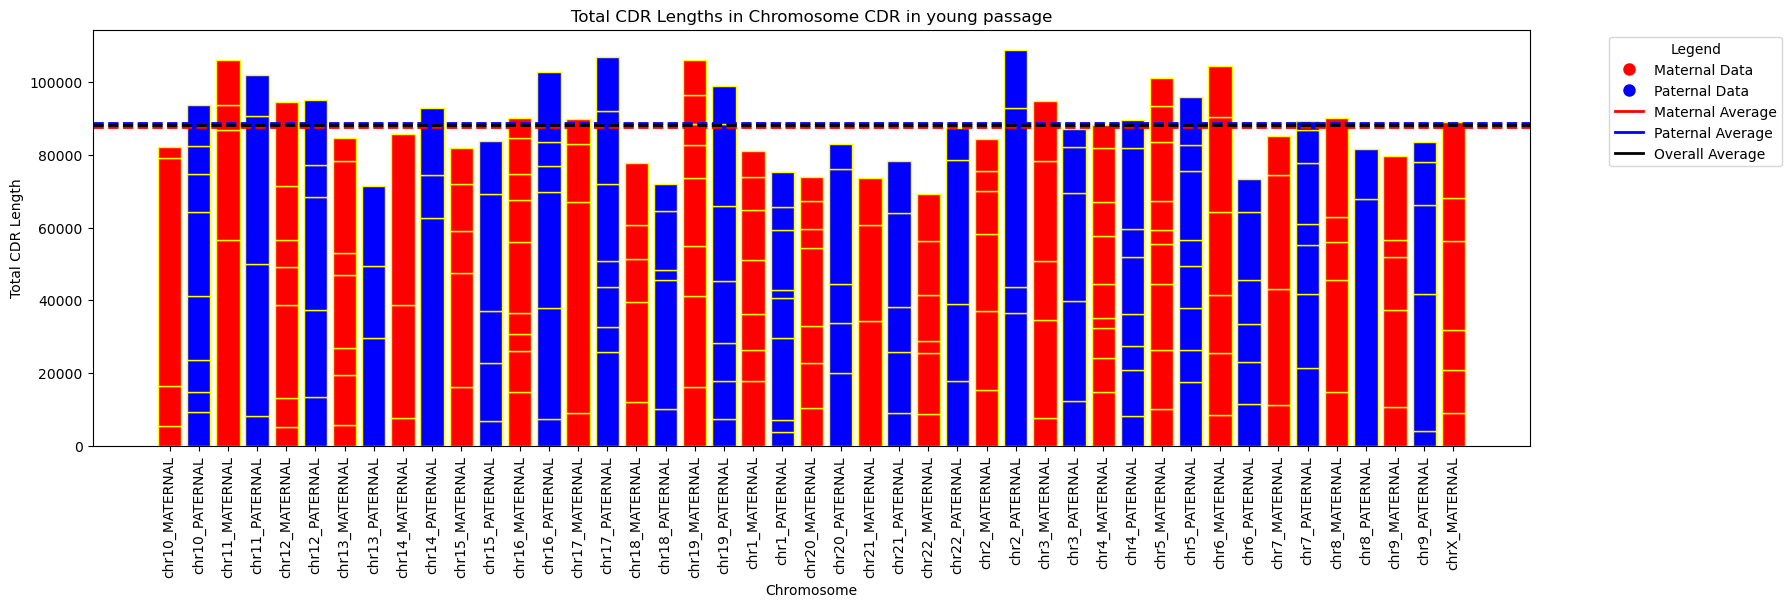

In [10]:


# Initialize an empty list to hold the data
data = []

# Iterate through cdr_regions_df to populate the data list
for index, row in cdr_regions_df.iterrows():
    chromosome = row['Chromosome']
    length = row['Difference']
    data.append({'Chromosome': chromosome, 'Region Length': length})

# Convert the list to a DataFrame
chromosome_regions = pd.DataFrame(data)

# Sort the chromosome_CDR DataFrame by its index
chromosome_CDR = chromosome_CDR.sort_index()

# Create the figure and adjust the size
plt.figure(figsize=(18, 15))

# Plot the third subplot
plt.subplot(3, 1, 3)

# Iterate through each chromosome and plot the regions
for chromosome in chromosome_CDR.index:
    regions = chromosome_regions[chromosome_regions['Chromosome'] == chromosome]
    bottom = 0
    for _, region in regions.iterrows():
        length = region['Region Length']
        color = 'red' if '_MATERNAL' in chromosome else 'blue'
        plt.bar(chromosome, length, bottom=bottom, color=color, edgecolor='yellow')
        bottom += length

plt.title('Total CDR Lengths in Chromosome CDR in young passage')
plt.xlabel('Chromosome')
plt.ylabel('Total CDR Length')
plt.xticks(rotation=90)  # Make x-axis ticks completely vertical

# Add horizontal lines for averages
plt.axhline(y=maternal_avg, color='red', linestyle='--', linewidth=2, label='Maternal Average')
plt.axhline(y=paternal_avg, color='blue', linestyle='--', linewidth=2, label='Paternal Average')
plt.axhline(y=overall_avg, color='black', linestyle='--', linewidth=2, label='Overall Average')

# Add a legend
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Maternal Data'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Paternal Data'),
    plt.Line2D([0], [0], color='red', linestyle='-', linewidth=2, label='Maternal Average'),
    plt.Line2D([0], [0], color='blue', linestyle='-', linewidth=2, label='Paternal Average'),
    plt.Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='Overall Average')
], title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()


# Show the plot
plt.show()

### Inputs:
- `chromosome_CDR`: DataFrame containing total CDR length and number for each chromosome.

### Outputs:
- `total_CDR_differences`: List of total CDR differences between maternal and paternal chromosomes.
  - Example:
    ```python
    [1, 2, 3, ...]
    ```
- `total_CDR_lengths`: List of total CDR lengths between maternal and paternal chromosomes.
  - Example:
    ```python
    [1000, 2000, 3000, ...]
    ```
- `total_CDR_differences_chromosome_histogram`: Dictionary of total CDR differences for each chromosome.
  - Example:
    ```python
    {
        'chr1': 1,
        'chr2': 2,
        ...
    }
    ```
- `total_CDR_lengths_histogram`: Dictionary of total CDR lengths for each chromosome.
  - Example:
    ```python
    {
        'chr1': 1000,
        'chr2': 2000,
        ...
    }
    ```
- A plot showing total CDR differences and lengths between chromosomes for old passage.

### Description:
This cell calculates the total CDR differences and lengths between maternal and paternal chromosomes and creates histograms to visualize these differences and lengths.

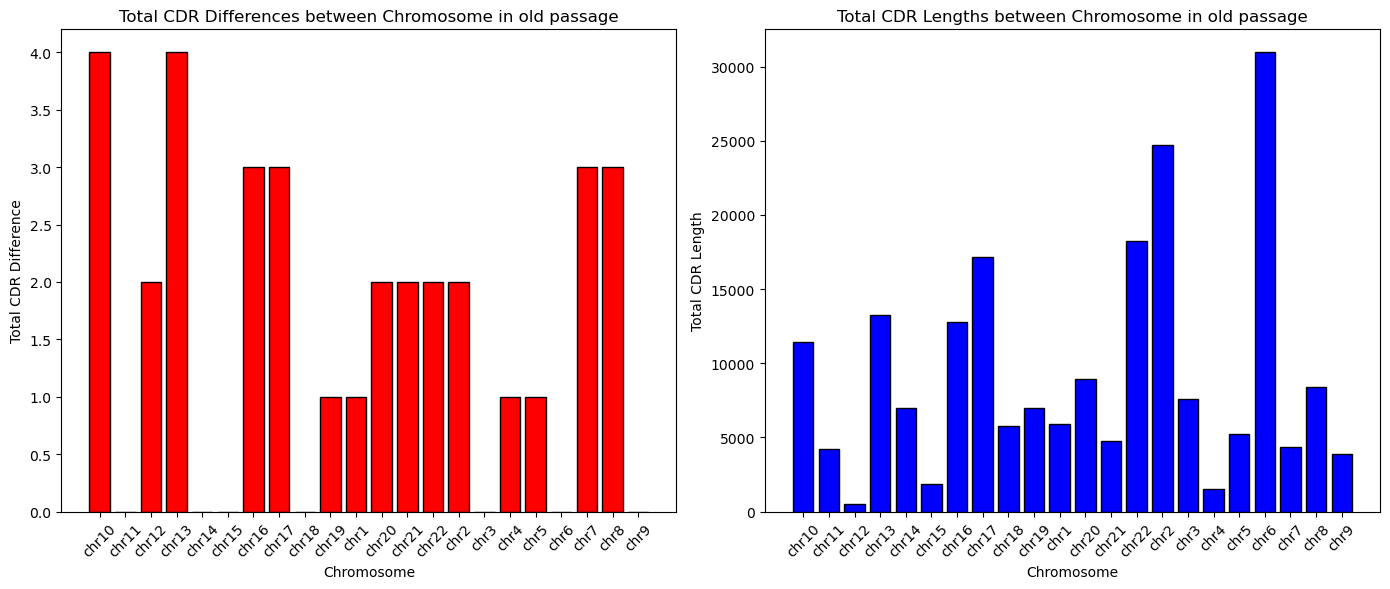

In [11]:

maternal_mask = chromosome_CDR.index.str.endswith('_MATERNAL')
paternal_mask = chromosome_CDR.index.str.endswith('_PATERNAL')
total_CDR_differences = []
total_CDR_lengths = []
total_CDR_differences_chromosome_histogram = {}
total_CDR_lengths_histogram = {}
chromosome_CDR_maternal = chromosome_CDR[maternal_mask]
chromosome_CDR_paternal = chromosome_CDR[paternal_mask]

for (index1, row1), (index2, row2) in zip(chromosome_CDR_maternal.iterrows(), chromosome_CDR_paternal.iterrows()):
    chromosome_prefix = index1.split ('_')[0]
    mat_total_CDR_length = row1['total CDR length']
    mat_total_CDR_num = row1['CDR num']
    pat_total_CDR_length = row2['total CDR length']
    pat_total_CDR_num = row2['CDR num']
    
    
    total_CDR_difference = abs (mat_total_CDR_num - pat_total_CDR_num)
    total_CDR_length = abs (mat_total_CDR_length - pat_total_CDR_length)
    total_CDR_differences.append(total_CDR_difference)
    total_CDR_lengths.append(total_CDR_length)
    
    total_CDR_differences_chromosome_histogram[chromosome_prefix] = total_CDR_difference
    total_CDR_lengths_histogram[chromosome_prefix] = total_CDR_length
    
    
    
    
chromosomes = list(total_CDR_differences_chromosome_histogram.keys())
cdr_differences = list(total_CDR_differences_chromosome_histogram.values())
cdr_lengths = list(total_CDR_lengths_histogram.values())



# Plotting the histograms
plt.figure(figsize=(14, 6))

# Bar plot for total CDR differences
plt.subplot(1, 2, 1)
plt.bar(chromosomes, cdr_differences, color='red', edgecolor='black')
plt.title('Total CDR Differences between Chromosome in old passage')
plt.xlabel('Chromosome')
plt.ylabel('Total CDR Difference')
plt.xticks(rotation=45)  

# Bar plot for total CDR lengths
plt.subplot(1, 2, 2)
plt.bar(chromosomes, cdr_lengths, color='blue', edgecolor='black')
plt.title('Total CDR Lengths between Chromosome in old passage')
plt.xlabel('Chromosome')
plt.ylabel('Total CDR Length')
plt.xticks(rotation=45)  



# Show plots
plt.tight_layout()
plt.show()

### Inputs:
- `input_file_alpha_sat`: Path to the input file containing alpha satellite data.

### Outputs:
- `alpha_sat_start_end_data_frame`: DataFrame containing alpha satellite start and end positions for each chromosome.
  - Example:
    ```python
    chr_alpha_start  chr_alpha_end
    chr1                1000          2000
    chr1_1              3000          4000
    ...
    ```

### Description:
This cell reads the alpha satellite data from the input file and creates a DataFrame to store the start and end positions for each chromosome.

In [12]:
input_file_alpha_sat = '/private/groups/migalab/dan/data_analysis/alpha_bed/hg002v1.0.fasta.manualAlpha.cenSat_H1L.bed'
 
alpha_sat_start_end_columns = [ 'chr_alpha_start', 'chr_alpha_end']
alpha_sat_start_end_data_frame = pd.DataFrame( columns = alpha_sat_start_end_columns )
with open(input_file_alpha_sat, 'r') as infile_alpha_sat:  
    last_chr = ''
    n = 0 
    for row in infile_alpha_sat:
        line_num = 0 
        same_chr = False
        
        chr_num = row.split('\t')[0]
        if last_chr == chr_num:
            same_chr = True

        alpha_start = int(row.split('\t')[1])
        alpha_end = int(row.split('\t')[2].split('\n')[0])
        alpha_status = row.split('\t')[3]
        if same_chr == False:

            alpha_sat_start_end_data_frame.at[chr_num, 'chr_alpha_start'] = alpha_start
            alpha_sat_start_end_data_frame.at[chr_num, 'chr_alpha_end'] = alpha_end
            last_chr = chr_num
        elif same_chr == True: 
            alpha_sat_start_end_data_frame.at[chr_num + "_" + str(n), 'chr_alpha_start'] = alpha_start
            alpha_sat_start_end_data_frame.at[chr_num + "_" + str(n), 'chr_alpha_end'] = alpha_end   
            n += 1   
        




### Inputs:
- `alpha_sat_start_end_data_frame`: DataFrame containing alpha satellite start and end positions for each chromosome.
- `CDR_over_all_plot_dic`: Dictionary containing CDR data for each chromosome.

### Outputs:
- A plot showing chromosome segments with alpha satellite and CDR regions.

### Description:
This cell creates a plot to visualize chromosome segments with alpha satellite and CDR regions. It iterates through each unique chromosome prefix and plots the alpha satellite regions and CDR regions, with different colors for maternal and paternal data.

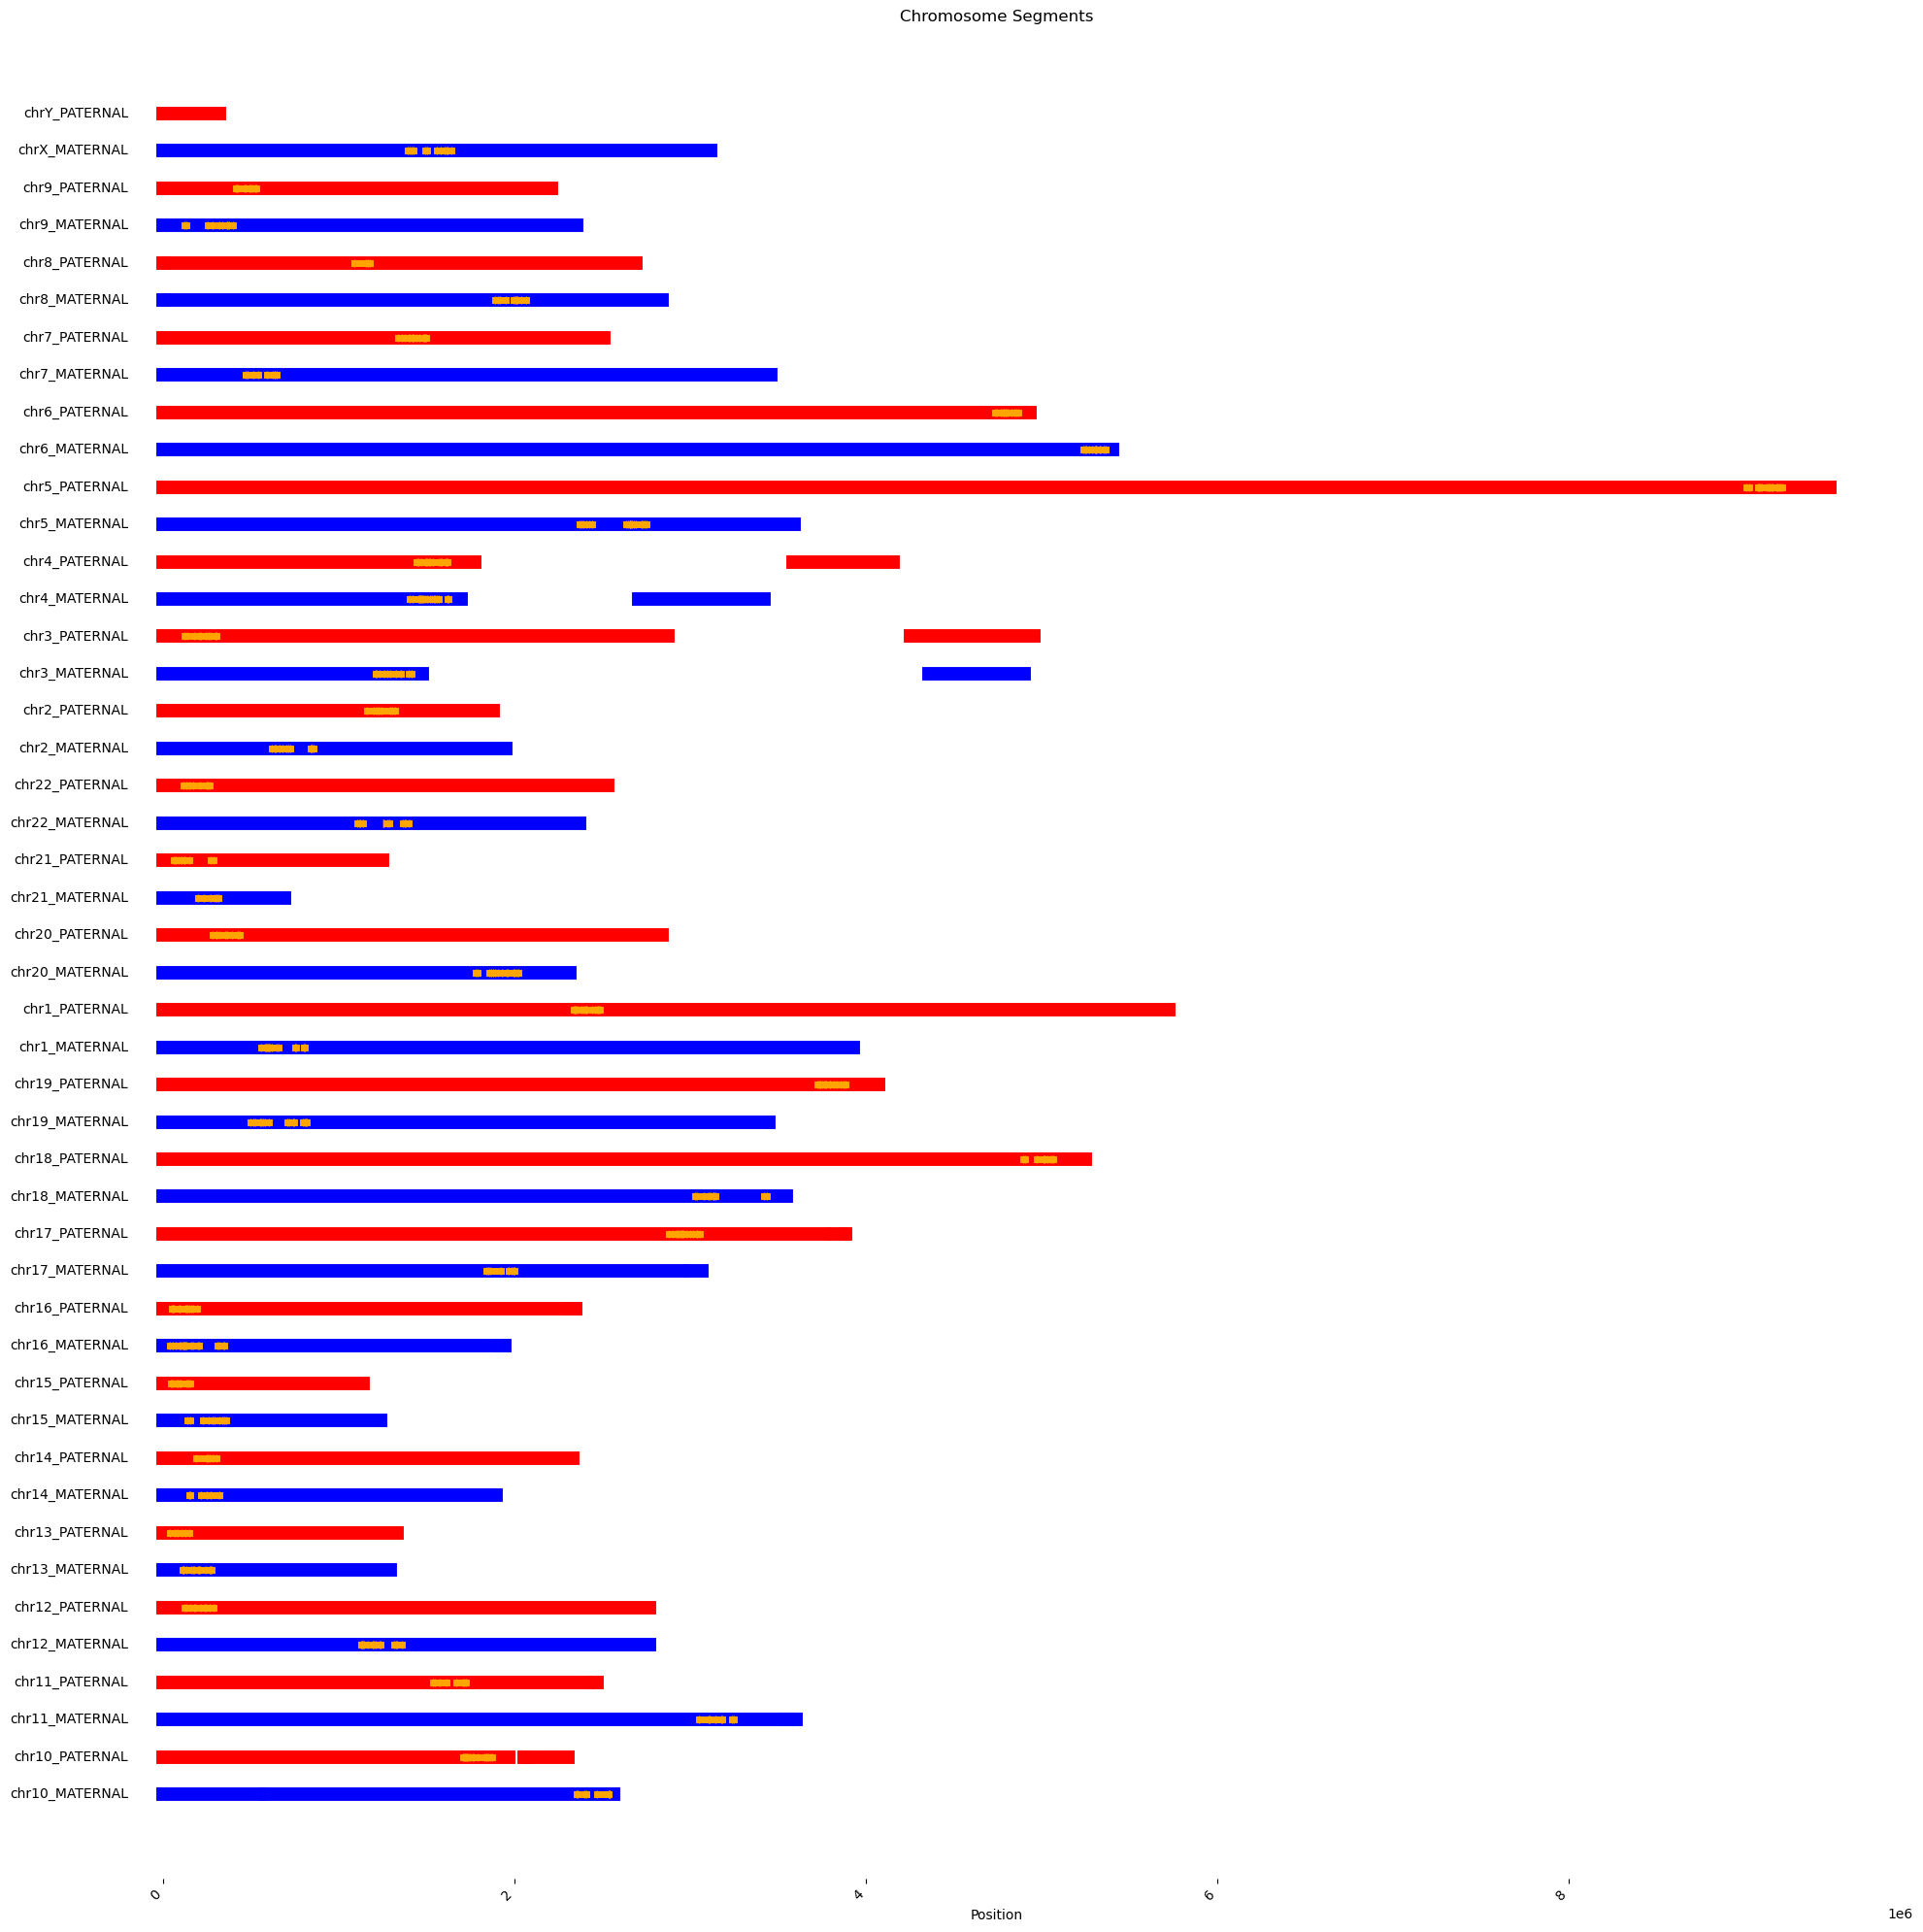

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Function to get chromosome prefix
def get_chromosome_prefix(chromosome):
    return chromosome.split('_')[0] + '_' + chromosome.split('_')[1]

# Add chromosome prefix column
alpha_sat_start_end_data_frame['chromosome_prefix'] = alpha_sat_start_end_data_frame.index.to_series().apply(get_chromosome_prefix)
chromosome_prefixes = [prefix for prefix in alpha_sat_start_end_data_frame['chromosome_prefix'].unique() if prefix not in ['chrX_MATERNAL', 'chrY_PATERNAL']]
# Initialize plot
plt.figure(figsize=(20, 20))  # Increased figure size

# Dictionary to store the starting position of each chromosome for both maternal and paternal
chromosome_start_positions = {}
for num in range (1,23):
        chromosome_start_positions[f'chr{num}_PATERNAL'] = 0
        chromosome_start_positions[f'chr{num}_MATERNAL'] = 0
chromosome_start_positions['chrX_MATERNAL'] =0
chromosome_start_positions['chrY_PATERNAL'] =0
# Set the spacing between y-axis labels
y_spacing = 2

label_x_position = -0.02e7  
# Iterate through each unique chromosome prefix
for idx, chromosome_prefix in enumerate(alpha_sat_start_end_data_frame['chromosome_prefix'].unique()):
    chromosome_data = alpha_sat_start_end_data_frame[alpha_sat_start_end_data_frame['chromosome_prefix'] == chromosome_prefix]
    
    maternal_data = chromosome_data[chromosome_data.index.str.contains('MATERNAL')]
    paternal_data = chromosome_data[chromosome_data.index.str.contains('PATERNAL')]
    if not maternal_data.empty:
        start_position = maternal_data['chr_alpha_start'].min()
        
        for row_index, row in maternal_data.iterrows():
            chromosome_start_positions[chromosome_prefix] += start_position
            start = row['chr_alpha_start'] - start_position
            end = row['chr_alpha_end'] - start_position
            plt.plot([start, end], [idx * y_spacing, idx * y_spacing], marker='|', color='blue', linewidth=10)
        plt.text(label_x_position, idx * y_spacing, chromosome_prefix, ha='right', va='center', fontsize=10, color='black')
        if chromosome_prefix in CDR_over_all_plot_dic:
            for region in CDR_over_all_plot_dic[chromosome_prefix]:
                chromosome, start_CDR, end_CDR, label = region
                color = 'orange' if 'PATERNAL' in chromosome else 'orange'
                additional_y_position = idx * y_spacing 
                plt.plot([start_CDR - start_position, end_CDR - start_position], [additional_y_position, additional_y_position], marker='|', color=color, linewidth=5)
    
    if not paternal_data.empty:
        start_position = paternal_data['chr_alpha_start'].min()
        chromosome_start_positions[chromosome_prefix] += start_position
        for row_index, row in paternal_data.iterrows():
            start = row['chr_alpha_start'] - start_position
            end = row['chr_alpha_end'] - start_position
            plt.plot([start, end], [idx * y_spacing , idx * y_spacing ], marker='|', color='red', linewidth=10)
        plt.text(label_x_position, idx * y_spacing, chromosome_prefix, ha='right', va='center', fontsize=10, color='black')

        if chromosome_prefix in CDR_over_all_plot_dic:
            for region in CDR_over_all_plot_dic[chromosome_prefix]:
                chromosome, start_CDR, end_CDR, label = region
                color = 'orange' if 'PATERNAL' in chromosome else 'orange'
                additional_y_position = idx * y_spacing 
                plt.plot([start_CDR - start_position, end_CDR - start_position], [additional_y_position, additional_y_position], marker='|', color=color, linewidth=5)





# Remove the borders (spines)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Remove the y-ticks
plt.gca().yaxis.set_ticks([])

# Adjust plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.xlabel('Position')
plt.title('Chromosome Segments')


# Show plot
plt.tight_layout()
plt.show()


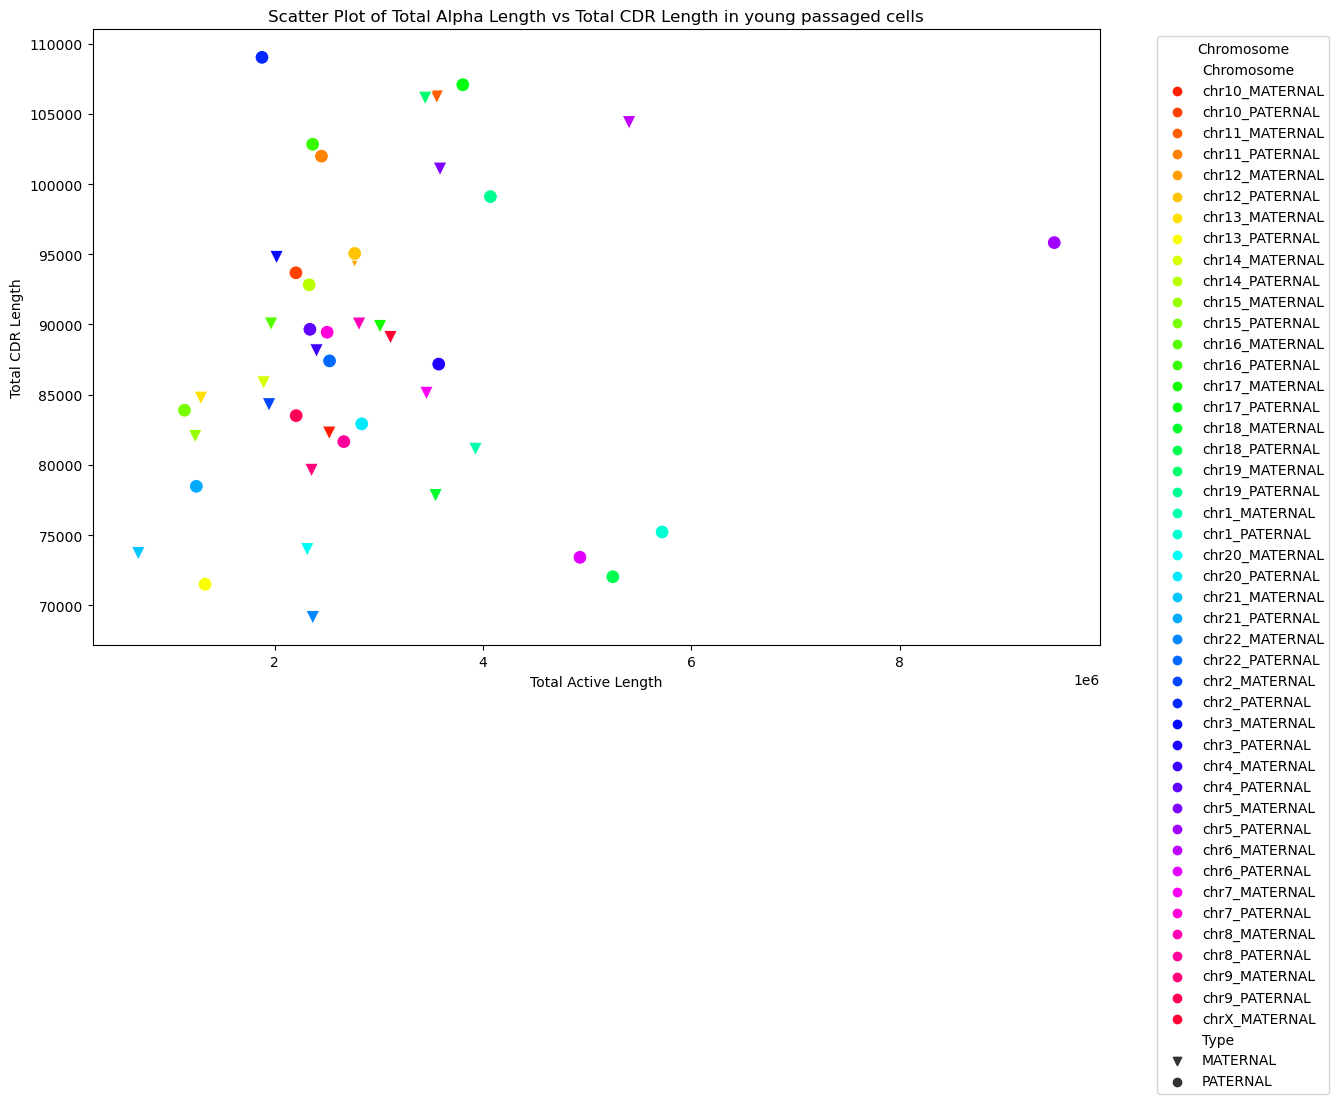

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming alpha_sat_start_end_data_frame and chromosome_CDR are already defined

# Calculate total alpha length for each chromosome, including maternal and paternal distinctions
alpha_lengths = alpha_sat_start_end_data_frame.groupby(alpha_sat_start_end_data_frame.index.str.split('_').str[0:2].str.join('_')).apply(
    lambda df: (df['chr_alpha_end'] - df['chr_alpha_start']).sum()
).reset_index()
alpha_lengths.columns = ['Chromosome', 'Total Alpha Length']

# Extract total CDR lengths for each chromosome
cdr_lengths = chromosome_CDR.reset_index()[['index', 'total CDR length']]
cdr_lengths.columns = ['Chromosome', 'Total CDR Length']

# Merge the two dataframes on Chromosome
merged_df = pd.merge(alpha_lengths, cdr_lengths, on='Chromosome')

# Add a new column to indicate maternal or paternal
merged_df['Type'] = merged_df['Chromosome'].apply(lambda x: 'MATERNAL' if '_MATERNAL' in x else 'PATERNAL')

# Create scatter plot with different colors for each chromosome and different markers for maternal and paternal
plt.figure(figsize=(13, 8))
palette = sns.color_palette("hsv", len(merged_df['Chromosome'].unique()))
sns.scatterplot(data=merged_df, x='Total Alpha Length', y='Total CDR Length', hue='Chromosome', style='Type', markers={'MATERNAL': 'v', 'PATERNAL': 'o'}, palette=palette, s=100)
plt.title('Scatter Plot of Total Alpha Length vs Total CDR Length in young passaged cells')
plt.xlabel('Total Active Length')
plt.ylabel('Total CDR Length')
plt.legend(title='Chromosome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()